## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import Dropout

"""
建立神經網路，並加入 dropout layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [8]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.5, 0.25, 0.1]

In [9]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for dropout in Dropout_EXP:
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=dropout)
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results    
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    name_tag = 'drop_rate_%.2f' % dropout
    results[name_tag] = {'train-loss': train_loss,
                         'valid-loss': valid_loss,
                         'train-acc': train_acc,
                         'valid-acc': valid_acc}

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)

50000/50000 [==============================] - 22s 447us/step - loss: 1.9640 - acc: 0.2602 - val_loss: 2.0690 - val_acc: 0.2489
Epoch 43/50
50000/50000 [==============================] - 22s 444us/step - loss: 1.9562 - acc: 0.2607 - val_loss: 2.0680 - val_acc: 0.2400
Epoch 44/50
50000/50000 [==============================] - 23s 450us/step - loss: 1.9618 - acc: 0.2598 - val_loss: 2.0881 - val_acc: 0.2443
Epoch 45/50
50000/50000 [==============================] - 23s 458us/step - loss: 1.9590 - acc: 0.2609 - val_loss: 2.0418 - val_acc: 0.2662
Epoch 46/50
50000/50000 [==============================] - 22s 439us/step - loss: 1.9550 - acc: 0.2608 - val_loss: 2.0905 - val_acc: 0.2277
Epoch 47/50
50000/50000 [==============================] - 22s 437us/step - loss: 1.9560 - acc: 0.2617 - val_loss: 2.0595 - val_acc: 0.2645
Epoch 48/50
50000/50000 [==============================] - 23s 458us/step - loss: 1.9618 - acc: 0.2602 - val_loss: 1.9969 - val_acc: 0.2740
Epoch 49/50
50000/50000 [=======

50000/50000 [==============================] - 22s 444us/step - loss: 1.5158 - acc: 0.4549 - val_loss: 1.4772 - val_acc: 0.4835
Epoch 41/50
50000/50000 [==============================] - 22s 446us/step - loss: 1.5162 - acc: 0.4560 - val_loss: 1.4802 - val_acc: 0.4856
Epoch 42/50
50000/50000 [==============================] - 23s 451us/step - loss: 1.5034 - acc: 0.4601 - val_loss: 1.4630 - val_acc: 0.4921
Epoch 43/50
50000/50000 [==============================] - 22s 445us/step - loss: 1.4991 - acc: 0.4626 - val_loss: 1.4658 - val_acc: 0.4835
Epoch 44/50
50000/50000 [==============================] - 22s 441us/step - loss: 1.5010 - acc: 0.4622 - val_loss: 1.4824 - val_acc: 0.4794
Epoch 45/50
50000/50000 [==============================] - 22s 445us/step - loss: 1.5031 - acc: 0.4609 - val_loss: 1.4533 - val_acc: 0.4823
Epoch 46/50
50000/50000 [==============================] - 22s 447us/step - loss: 1.4923 - acc: 0.4629 - val_loss: 1.4726 - val_acc: 0.4832
Epoch 47/50
50000/50000 [=======

50000/50000 [==============================] - 23s 454us/step - loss: 1.2161 - acc: 0.5608 - val_loss: 1.3310 - val_acc: 0.5314
Epoch 39/50
50000/50000 [==============================] - 27s 547us/step - loss: 1.2024 - acc: 0.5688 - val_loss: 1.3436 - val_acc: 0.5259
Epoch 40/50
50000/50000 [==============================] - 21s 429us/step - loss: 1.1927 - acc: 0.5705 - val_loss: 1.3372 - val_acc: 0.5273
Epoch 41/50
50000/50000 [==============================] - 21s 419us/step - loss: 1.1930 - acc: 0.5697 - val_loss: 1.3355 - val_acc: 0.5274
Epoch 42/50
50000/50000 [==============================] - 20s 409us/step - loss: 1.1787 - acc: 0.5740 - val_loss: 1.3441 - val_acc: 0.5254
Epoch 43/50
50000/50000 [==============================] - 20s 410us/step - loss: 1.1745 - acc: 0.5769 - val_loss: 1.3458 - val_acc: 0.5263
Epoch 44/50
50000/50000 [==============================] - 22s 433us/step - loss: 1.1745 - acc: 0.5766 - val_loss: 1.3456 - val_acc: 0.5286
Epoch 45/50
50000/50000 [=======

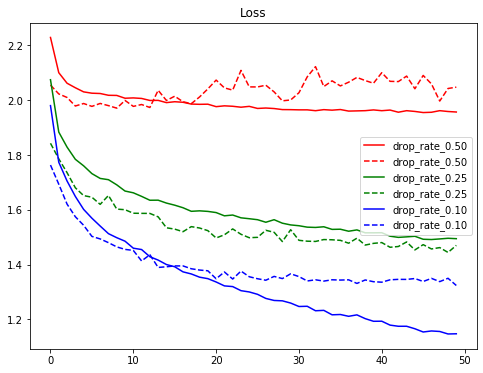

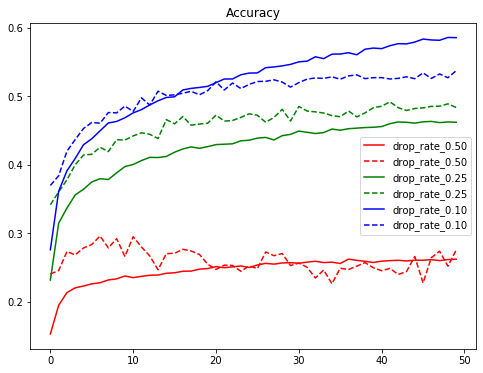

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()